
Data Collection and Processing Technologies

---

# OpenCV
## Automatic Number Plate Recognition

---

<img src = "https://929687.smushcdn.com/2633864/wp-content/uploads/2020/09/opencv_anpr_example.jpg?lossy=1&strip=1&webp=1" width = "300">

In [1]:
import cv2 as cv
###import easyocr
import imutils

import numpy as np
import matplotlib.pyplot as plt

## 1. Read in Image

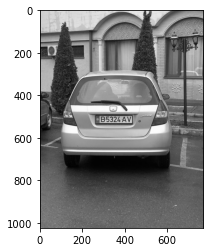

In [11]:
img = cv.imread('2.jpeg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(cv.cvtColor(gray, cv.COLOR_BGR2RGB))

## 2. Apply filter and find edges for localization

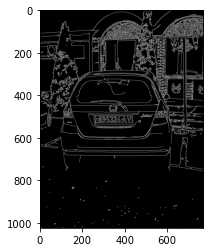

In [3]:
#Noise reduction
bfilter = cv.bilateralFilter(gray, 11, 17, 17) 

#Edge detection
edged = cv.Canny(bfilter, 30, 200) 

plt.imshow(cv.cvtColor(edged, cv.COLOR_BGR2RGB))

## 3. Find Contours and Apply Mask

In [12]:
keypoints = cv.findContours(edged.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv.contourArea, reverse=True)[:10]

In [13]:
location = None
for contour in contours:
    approx = cv.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [14]:
location

array([[[257, 497]],

       [[431, 493]],

       [[434, 536]],

       [[265, 539]]], dtype=int32)

In [15]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv.drawContours(mask, [location], 0,255, -1)
new_image = cv.bitwise_and(img, img, mask=mask)

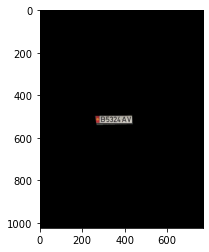

In [16]:
plt.imshow(cv.cvtColor(new_image, cv.COLOR_BGR2RGB))

In [17]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

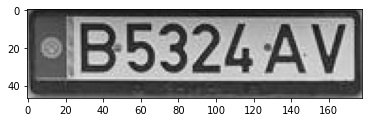

In [10]:
plt.imshow(cv.cvtColor(cropped_image, cv.COLOR_BGR2RGB))

In [23]:
new_image = cv.drawContours(mask, [location], 0,255, -1)

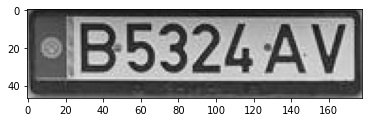

In [45]:
plt.imshow(cv.cvtColor(cropped_image, cv.COLOR_BGR2RGB))

In [53]:
cv.rectangle(img, ([257, 497], [431, 493]), ([257, 497]+[434, 536], [431, 493]+[265, 539]), (0, 255, 0), thickness = 2)

    
# 7. showing the image  
cv.imshow('Detected Faces', img)
   

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
>  - argument for rectangle() given by name ('thickness') and position (4)
>  - argument for rectangle() given by name ('thickness') and position (4)


## 4. Use Easy OCR To Read Text

In [24]:
reader = easyocr.Reader(['en'])


NameError: name 'easyocr' is not defined

In [25]:
result = reader.readtext(cropped_image)
result

NameError: name 'reader' is not defined